# Predicting the Attention Rate of Patients by Monitoring their Emotions

- Name: Akshara Shukla
- Class: AI43
- Genuine Challenge_01

## Introduction
This project consists of creating a report on aiding doctors in large multinational hospitals to 
understand different patient behaviors. Fundamentally, the project goal is to showcase the 
power of Artificial Intelligence and Machine Learning in healthcare and how to provide a 
better patient experience by classifying them on their emotions, mainly the four basic 
emotions (happy, sad, angry, and relaxing) and accompanying the ones that are in pain and 
require immediate or more attention and care. The system is Areya and it aims at providing some portrait of notification to the doctors about patients who illustrate negative emotions i.e., angry and sad.

This notebook consists the exploratory data analysis of the dataset FER-2013. This dataset was downloaded from kaggle and consists of training set having 28,709 examples and the public test set with 3,589 examples.

## Setup

We start with importing all packages we will need. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os #Operating Systems for fetching image data from folders/sub-folders on my pc
import glob #global for getting filenames matching a specific pattern
import collections as cl #For storing filenames in a container that will hold the count of each of the elements present in the container.


from keras.preprocessing import image
from keras.preprocessing.image import load_img #for loading all the images from a particular directory for visualization

%matplotlib inline

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version', sns.__version__)

numpy version: 1.18.5
pandas version: 1.0.5
matplotlib version: 3.2.2
seaborn version 0.10.1


# 1- Load FER-2013 Dataset

The dataset FER-2013 is downloaded on my local pc folder which consists of a train and test folder. To import the folders we use their paths which are saved on the same directory as where this notebook is saved. We saved the separate paths in train_dir and test_dir respectively.

In [2]:
#Defining paths to our train and test folders
train_dir = 'emotion_recognition/train/'
test_dir = 'emotion_recognition/test/'

In [3]:
print("The FER-2013 Dataset")
print("---------------------")
print("This dataset has been reduced to using the 4 basic emotions (0=Angry, 1=Happy, 2=Relaxed, 3=Sad) since, the aim of this project is to classify patients on the basic emotions expressed by humans.")
print()
print("As described on the original website:")
print()
print("\tThe data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less\n\tcentred and occupies about the same amount of space in each image.The task is to categorize each face based on the emotion shown in the facial\n\texpression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of\n\t28,709 examples and the public test set consists of 3,589 examples.")
print()
print("The target variables are the emotions being classified in real time through the use of camera. Additionally, after classification, the patient with\nnegative emotions i.e. (Angry or Sad) would generate a notification saying 'Needing Attention'.")
print()
print("We can use these images under the license, Database: Open Database, Contents: Database Contents. More info at: https://opendatacommons.org/licenses/dbcl/1-0/")

The FER-2013 Dataset
---------------------
This dataset has been reduced to using the 4 basic emotions (0=Angry, 1=Happy, 2=Relaxed, 3=Sad) since, the aim of this project is to classify patients on the basic emotions expressed by humans.

As described on the original website:

	The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less
	centred and occupies about the same amount of space in each image.The task is to categorize each face based on the emotion shown in the facial
	expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of
	28,709 examples and the public test set consists of 3,589 examples.

The target variables are the emotions being classified in real time through the use of camera. Additionally, after classification, the patient with
negative emotions i.e. (Angry or Sad) would generate a notification saying 'Needin

In [4]:
#Finding folders in our training directory containing images
print(os.listdir(train_dir))
print(range(len(os.listdir(train_dir))))

['Angry', 'Happy', 'Relaxed', 'Sad']
range(0, 4)


We used os.listdir() to fetch all the folders loaded in our path train_dir from our operating systems. The results show that we have 4 folders each containing images of different emotions, mainly *Angry*, *Happy*, *Relaxed*, and *Sad* which are the emotions our model will classifying of different patients. All emotions are in the range of 0 to 4, starting the index from 0.

# 2 - Investigate the FER-2013 Dataset

First, lets investigate how many images we have in our training and testing set for each emotion and adding them all up to find total images for training. Also, plotting them in a bar graph for better visualization.

Angry has 3995 images available
Happy has 7216 images available
Relaxed has 4965 images available
Sad has 4830 images available
-------------------------------------
The total images in our train directory are: 21006


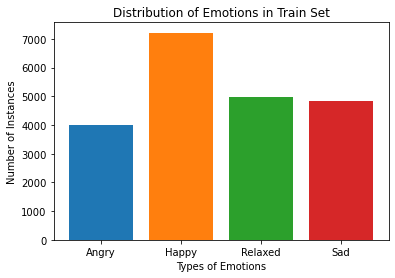

In [5]:
#Starting total_img from 0 because the images will be adding up after every run
total_img = 0
#Going in each training emotion folder and calculating the number of files by using len().
for emotions in os.listdir(train_dir):
    img_count = len(os.listdir(train_dir + emotions))
    total_img += img_count
    print(f'{emotions} has {img_count} images available')
    plt.bar(emotions,img_count)

plt.xlabel('Types of Emotions')
plt.ylabel('Number of Instances')
plt.title('Distribution of Emotions in Train Set')
print("-------------------------------------")
print(f'The total images in our train directory are: {total_img}')

From the above bar graph, we can say the *Happy* is the emotion containing maximum number of images and *Angry* being the emotion with lowest number of training images with 3995 images available. We can infer that this can lead to a small biased when building our classification model. The total number of training images are ~21K.

Angry has 958 images available
Happy has 1774 images available
Relaxed has 1233 images available
Sad has 1247 images available
-------------------------------------
The total images in our test directory are: 5212


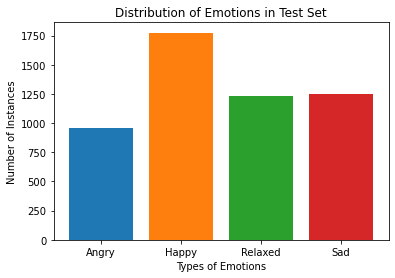

In [6]:
total_img = 0
for emotion in os.listdir(test_dir):
    img_count = len(os.listdir(test_dir + emotion))
    total_img += img_count
    print(f'{emotion} has {img_count} images available')
    plt.bar(emotion,img_count)

plt.xlabel('Types of Emotions')
plt.ylabel('Number of Instances')
plt.title('Distribution of Emotions in Test Set')
print("-------------------------------------")
print(f'The total images in our test directory are: {total_img}')

From our graph above of test set, we can see that *Happy* is the emotion with the most images and *Angry* with the lowest with only 958 images which can also be found in our training set. Additionally, the total number of images for testing are ~52K

Next, we will be understanding how the images are named in our training set by using the glob() short for global function, which helps in fetching files with similar patterns which in our case is files ending in ".jpg" format. Setting recursive to True because we want this pattern to be repeated for every file.

In [7]:
#Returns the first 3 image names in our folder for Angry emotion.
print("The first three file names in Angry folder:")
files = glob.glob('emotion_recognition/train/Angry/**/*.jpg', 
                   recursive = True)
for file in files[:3]:
    print(file)

The first three file names in Angry folder:
emotion_recognition/train/Angry\Training_10118481.jpg
emotion_recognition/train/Angry\Training_10120469.jpg
emotion_recognition/train/Angry\Training_10131352.jpg


<b>From our above chunk, we can infer that every image in our training set are named in format "Training_" with a unique number.</b>

Nextly, we will try to visualize the first 30 images of *Happy* image by setting the path to train_dir + "Happy/" and using plt.imread to read the image and plt.imshow() to print the image. We added [i] at the end of os.listdir() to list our full path with the name of the image files. If we didn't mention it, the permission was getting denied.

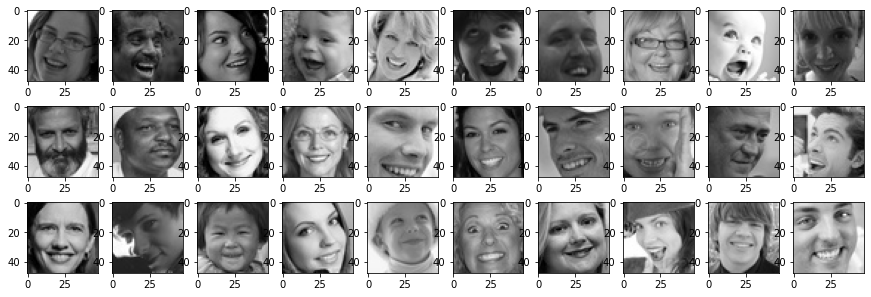

In [8]:
#Plotting the first 30 images from our Happy directory
fig=plt.figure(figsize=(15, 5))
for i in range(1,31):
    img = load_img(train_dir + 'Happy/' + os.listdir(train_dir + 'Happy/')[i])
    fig.add_subplot(3,10,i)
    plt.imshow(img, cmap = "gray")

We will also visualize what images are being trained for *Angry* folder.

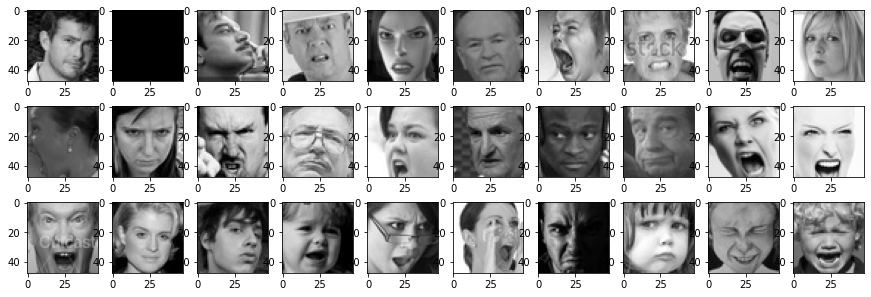

In [9]:
#Plotting the first 30 images from our Angry directory
fig=plt.figure(figsize=(15, 5))
for i in range(1,31):
    img = load_img(train_dir + 'Angry/' + os.listdir(train_dir + 'Angry/')[i])
    fig.add_subplot(3,10,i)
    plt.imshow(img, cmap = "gray")

Understanding the pixel dimensions of our images. We start by first reading the 13th image from our training set of "Relaxed" folder.

Image Dimension    :  (48, 48, 3)
Image Height       :  48
Image Width        :  48
Number of Channels :  3


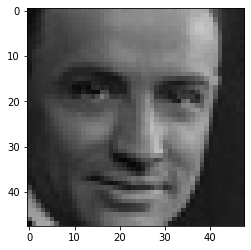

In [10]:
# Read image
img = load_img(train_dir + 'Relaxed/' + os.listdir(train_dir + 'Relaxed/')[13])

# Changing image to an array and checking the dimensions of image
img = np.array(img)
dimensions = img.shape

# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)
plt.imshow(img)

Images in our dataset are <b>48x48 pixels</b> with number of channels <b>3 indicating the presence of RGB colors.</b>

Next, looking if our pixel values are normalized and if they require scaling. For this we uploaded an image from our *Happy* folder and turned into into an array for finding it's pixel values. From which we can see the pixel values range between 0 and 254, so we need to scale them.

In [11]:
#Reading the min and the max pixel values of a random image picked from Happy folder.
img = image.load_img('emotion_recognition/train/\happy\Training_60697941.jpg')
img = np.array(img)
print(f'The min value of the image pixels is: {img.min()}')
print(f'The max value of the image pixel is: {img.max()}')

The min value of the image pixels is: 0
The max value of the image pixel is: 254


Reading all the pixel values from our <b>train directory</b> and dividing them by 255.0 to make their pixel values between 0 and 1 and assigning them to pixel_train variable.

In [12]:
#Creating a path to fetch all the images from the train directory using glob.glob() global function.
path = glob.glob('emotion_recognition/train/**/*.jpg', recursive = True)

#Going through each image file in our train path
for file in path:
    img = plt.imread(file)  #Reading them as images
    img = np.array(img)     #Turning them into array 
    pixels_train = img/255.0      #Dividing each pixel value with 255.0
    #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max())) #For viewing each min and max pixel of rescaled images.
print("Before Scaling")
print('Min: %.3f, Max: %.3f' % (img.min(), img.max()))
print("After Scaling")
print('Min: %.3f, Max: %.3f' % (pixels_train.min(), pixels_train.max()))

Before Scaling
Min: 12.000, Max: 226.000
After Scaling
Min: 0.047, Max: 0.886


By using the <b>Min and Max scaler</b> to evaluate the normalization, we can see our minimum value is 12 and the maximum value is 226 before scaling. Therefore, it is necessary to normalize the pixel values by rescaling them. After scaling our pixel values range from 0 to 0.8 which is approximately 1 for our <b>training set</b>.

In [13]:
#Reading the new scaled pixel values ranging between 0 and 1
pixels_train

array([[0.09411765, 0.11372549, 0.10588235, ..., 0.46666667, 0.46666667,
        0.46666667],
       [0.14509804, 0.12156863, 0.08627451, ..., 0.46666667, 0.47058824,
        0.47058824],
       [0.14509804, 0.11764706, 0.10196078, ..., 0.4745098 , 0.47058824,
        0.47058824],
       ...,
       [0.18431373, 0.26666667, 0.30588235, ..., 0.50196078, 0.49411765,
        0.49411765],
       [0.16470588, 0.22352941, 0.27843137, ..., 0.49411765, 0.49019608,
        0.49019608],
       [0.2       , 0.18431373, 0.23921569, ..., 0.49019608, 0.48627451,
        0.48235294]])

Reading all the pixel values from our <b>test directory</b> and dividing them by 255.0 to make their pixel values between 0 and 1 and assigning them to pixel variables.

In [14]:
#Creating a path to fetch all the images from the test directory using glob.glob() global function.
path = glob.glob('emotion_recognition/test/**/*.jpg', recursive = True)

#Going through each image file in our train path
for file in path:
    img = plt.imread(file)  #Reading them as images
    img = np.array(img)     #Turning them into array 
    pixels_test = img/255.0      #Dividing each pixel value with 255.0
    #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max())) #For viewing each min and max pixel of rescaled images.
print("Before Scaling")
print('Min: %.3f, Max: %.3f' % (img.min(), img.max()))
print("After Scaling")
print('Min: %.3f, Max: %.3f' % (pixels_test.min(), pixels_test.max()))

Before Scaling
Min: 35.000, Max: 214.000
After Scaling
Min: 0.137, Max: 0.839


Similarly, we can see our minimum value is 35 and the maximum value is 214 before scaling. Therefore, after scaling our pixel values range from 0.123 to 0.8 which is approximately 1 for our <b>test set</b>. Hence, we can now say, our pixel values in both train and test are normalized.

In [15]:
#Reading the scaled pixel values of our testing set
pixels_test

array([[0.30980392, 0.35294118, 0.3254902 , ..., 0.56078431, 0.56078431,
        0.55686275],
       [0.26666667, 0.31764706, 0.3372549 , ..., 0.55686275, 0.55686275,
        0.56078431],
       [0.22352941, 0.2745098 , 0.32941176, ..., 0.54901961, 0.54901961,
        0.55686275],
       ...,
       [0.4       , 0.39215686, 0.38431373, ..., 0.50588235, 0.51764706,
        0.51764706],
       [0.39215686, 0.38823529, 0.37647059, ..., 0.50588235, 0.51764706,
        0.51764706],
       [0.38823529, 0.38039216, 0.37254902, ..., 0.50588235, 0.51764706,
        0.51764706]])

For understanding how clean our dataset is, we will find if our directories contain any duplicated images. We will carry this out by going through each file name and if their count is greater than 1 then it would indicate that there are duplicate files in our dataset. We decided to carry this our by first storing all the emotion directories and their file names with their count in a counter tuple and iterating through each file to see if it's count is greater than 1 or not.

In [16]:
#Forming a counter tuple for storing the name and the count of each instance
names = cl.Counter()

#Forming an array which contains the last path file of each emotion folder.
directories = ['Sad/','Angry/','Happy/','Relaxed/']

#Reading files ending with ".jpg" in Sad training directory
for d in directories:
    for file in os.listdir(train_dir + d):
        if file.endswith(".jpg"):
            names.update([file])      #Adding all the files with their count in our counter tuple
            
    #Going through the updated name counter variable which contains the count of each filename 
    for name, count in names.items():
        if count > 1:
            print(name,count)
        else: 
            break
print("No duplicate values, all images are unique!")

No duplicate values, all images are unique!


From above chunk, we can conclude that our all our file names are unique and don't contain any duplicate values.

<b>Plotting the images of different emotions present in our dataset.</b>

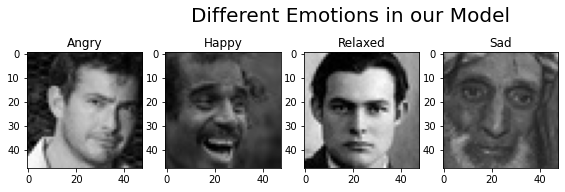

In [17]:
#Setting the size and nr of rows and columns for our figure.
fig = plt.subplots(nrows = 1, ncols = 4, figsize = (12,3))
#Instantiating the i to 1, to display all emotions with their first image as an integer and in range.
i = 1
for expression in os.listdir(train_dir):
    #Loading the images with the directory and using the separator (/) to take images from each folder.
    img = load_img((train_dir + expression +'/' + os.listdir(train_dir + expression)[i]))
    plt.subplot(1,5,i)
    plt.imshow(img)
    plt.title(expression)    #Giving each image their emotion as the title
    plt.suptitle('Different Emotions in our Model', fontsize = 20)   #Giviving the subplot constructed a title
    i += 1
plt.show()

<b>Plotting the first five images of each emotion in the *Training Set*</b>

In [18]:
#Defining a function to print images from different classes
def print_images(path,start,end):
    start_index = 1    #Starting the index with 1 so that the images are an integer and it ranges till the end number of our function.
    #Creating a subplot
    fig, axis = plt.subplots(nrows = 4, ncols = 5, figsize = (13,15))
    for expression in os.listdir(path):
        for i in range(start,end):
            img = load_img(path + expression + "/" + os.listdir(path + expression)[i])
            plt.subplot(4,5,start_index)
            plt.imshow(img, cmap = "gray")
            plt.title(expression)
            plt.suptitle(f'First 5 images of different emotions in our {path}', fontsize = 20)
            start_index += 1
    return print_images
#plt.tight_layout()
plt.show()

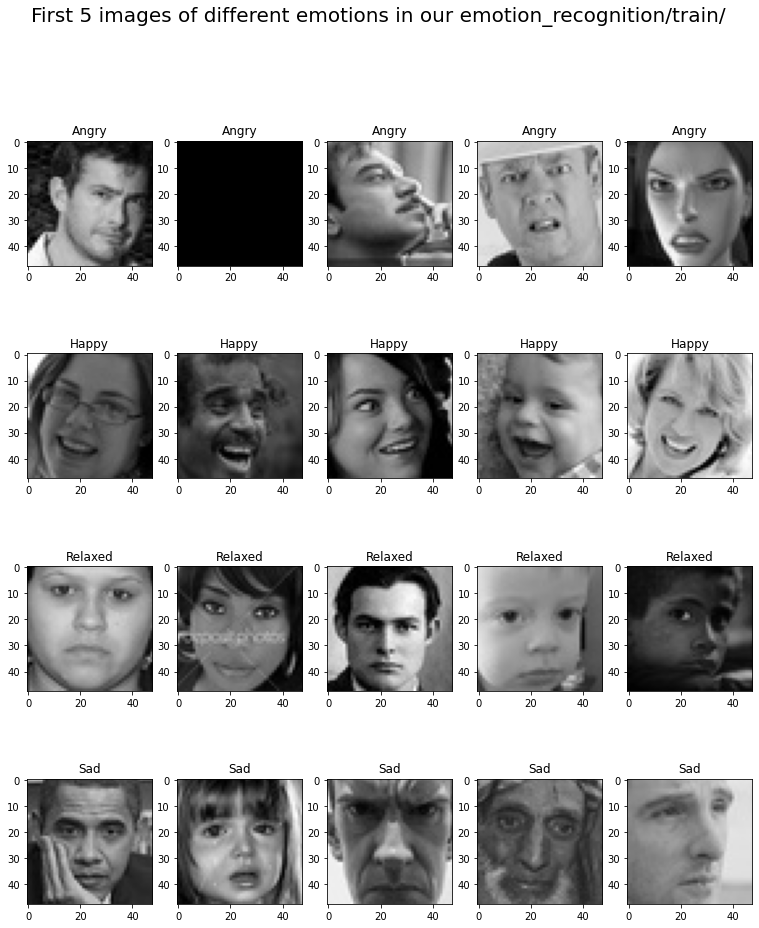

In [19]:
print_images(train_dir, 1,6);

From the above plot, we gained more insights of our images. We can see that the second image in *Angry* row is blank i.e. not containing any face. This won't cause much big of a problem but it fills up space from our data and results into having unnecessary data points. One solution to resolve it would be to manually go through the image directory and delete the images which do not contain a face.

<b>Plotting the first five images of each emotion in the *Testing Set*</b>

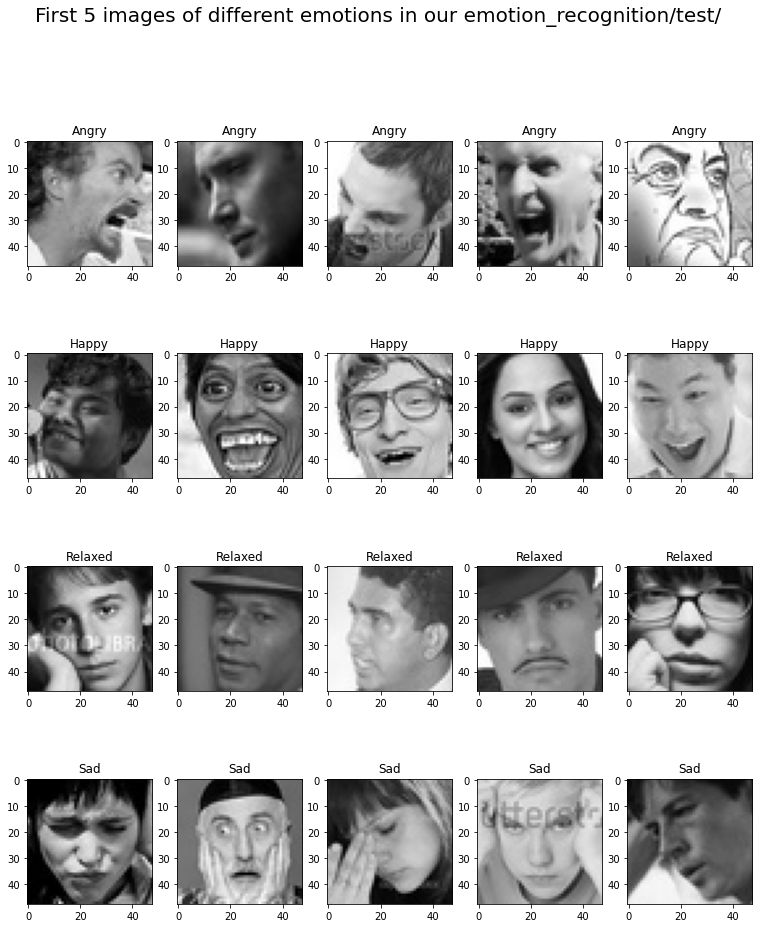

In [20]:
print_images(test_dir, 1,6);

# 3 - Conclusions

From the analysis done above, we can bring our exploratory data analysis to a conclusion that this dataset FER-2013 has enough training and testing samples for each of the emotions we will be classifying of different patients. Essentially, by plotting them we saw that they were all in grayscaled therefore the pixel size would be reduced and would prove to be highly ethical i.e. respecting all the races, gender and age groups respectively. Because our data is already splitted into training and testing, our next step would be to implement an algorithm which would classify emotions with high accuracy rates and train it efficiently. The dataset shall be further implemented as: 
- ytest = target from  test folder
- ytrain = target from train folder

- xtest = features from test folder
- xtrain = features from train folder